In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

from plotly import tools
import plotly.graph_objs as go

In [2]:
path = ('STA761_ResearchProject2024_Bank_Data.xlsx')
Bank_Data = pd.read_excel(path)

In [3]:
#Check data types
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45220 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45220 non-null  int64  
 1   customer_age                     45220 non-null  int64  
 2   occupation                       45220 non-null  object 
 3   marital_status                   45220 non-null  object 
 4   education_level                  45220 non-null  object 
 5   loan_default                     45220 non-null  object 
 6   account_balance                  45220 non-null  int64  
 7   account_overdraft_limit          45220 non-null  int64  
 8   home_ownership                   45220 non-null  object 
 9   personal_loan                    45220 non-null  object 
 10  contact_type                     45220 non-null  object 
 11  contact_day                      45220 non-null  int64  
 12  contact_month     

The data consists of 45220 records and 20 features of which one is the target feature, deposit 
uptake.The data has a combination of numerical and non-numerical data types.

#### Data Cleaning

In [6]:
#Check the number of missing values
print("Missing reords",Bank_Data.isnull().sum())

Missing reords customer_number                    0
customer_age                       0
occupation                         0
marital_status                     0
education_level                    0
loan_default                       0
account_balance                    0
account_overdraft_limit            0
home_ownership                     0
personal_loan                      0
contact_type                       0
contact_day                        0
contact_month                      0
contact_time_s                     0
contact_time_m                     0
contact_count_campaign             0
days_past_previous_campaign        0
contact_count_previous_campaign    0
take_up_previous_campaign          0
deposit_take_up                    0
dtype: int64


In [7]:
#Check for duplicated entries
num_duplicates = Bank_Data.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 6


In [8]:
#Remove duplicated entries
Bank_Data_2 = Bank_Data.drop_duplicates()

#Validate the removal of duplicates
num_duplicates = Bank_Data_2.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 0


In [9]:
Bank_Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45214 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45214 non-null  int64  
 1   customer_age                     45214 non-null  int64  
 2   occupation                       45214 non-null  object 
 3   marital_status                   45214 non-null  object 
 4   education_level                  45214 non-null  object 
 5   loan_default                     45214 non-null  object 
 6   account_balance                  45214 non-null  int64  
 7   account_overdraft_limit          45214 non-null  int64  
 8   home_ownership                   45214 non-null  object 
 9   personal_loan                    45214 non-null  object 
 10  contact_type                     45214 non-null  object 
 11  contact_day                      45214 non-null  int64  
 12  contact_month          

Having removed the duplicated records,the data consists of 45214 records and 20 features.However,the data imbalances still need to be handled.

In [11]:
# Replace 'unknown' responses with NaN (in order to be identified as missing)
Bank_Data_2.replace('unknown', np.nan, inplace=True)

C:\Users\LuckyboyM\AppData\Local\Temp\ipykernel_18692\935811109.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
#Check  for missing values again
print("Missing reords",Bank_Data_2.isnull().sum())

Missing reords customer_number                        0
customer_age                           0
occupation                           288
marital_status                         0
education_level                     1857
loan_default                           0
account_balance                        0
account_overdraft_limit                0
home_ownership                         0
personal_loan                          0
contact_type                       13022
contact_day                            0
contact_month                          0
contact_time_s                         0
contact_time_m                         0
contact_count_campaign                 0
days_past_previous_campaign            0
contact_count_previous_campaign        0
take_up_previous_campaign          36962
deposit_take_up                        1
dtype: int64


Post the tranaformation of 'unknown' responses to NaN,the entries are now recognized as missing values.There is missing data in occupation, education level,contact type,take up on previous campaign and the target variable deposit take up.

In [14]:
#Missing data percentages %
print("Missing reords",(Bank_Data_2.isnull().sum()/len(Bank_Data_2))*100)

Missing reords customer_number                     0.000000
customer_age                        0.000000
occupation                          0.636971
marital_status                      0.000000
education_level                     4.107135
loan_default                        0.000000
account_balance                     0.000000
account_overdraft_limit             0.000000
home_ownership                      0.000000
personal_loan                       0.000000
contact_type                       28.800814
contact_day                         0.000000
contact_month                       0.000000
contact_time_s                      0.000000
contact_time_m                      0.000000
contact_count_campaign              0.000000
days_past_previous_campaign         0.000000
contact_count_previous_campaign     0.000000
take_up_previous_campaign          81.749016
deposit_take_up                     0.002212
dtype: float64


Take up on previous campaign is missing with over 50% of the data.Thise will need to be droped because imputaion might introduce bias or reduce the reliability of the results.As well as contact type as it is missing with more than the chosen threshold of 20%.

In [16]:
# Drop columns missing with over 20%
Bank_Data_2_dropped = Bank_Data_2.drop(columns=['contact_type', 'take_up_previous_campaign'])

In [17]:
Bank_Data_2_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45214 entries, 0 to 45219
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45214 non-null  int64  
 1   customer_age                     45214 non-null  int64  
 2   occupation                       44926 non-null  object 
 3   marital_status                   45214 non-null  object 
 4   education_level                  43357 non-null  object 
 5   loan_default                     45214 non-null  object 
 6   account_balance                  45214 non-null  int64  
 7   account_overdraft_limit          45214 non-null  int64  
 8   home_ownership                   45214 non-null  object 
 9   personal_loan                    45214 non-null  object 
 10  contact_day                      45214 non-null  int64  
 11  contact_month                    45214 non-null  object 
 12  contact_time_s         

The data now consists of 18 features as contact type and take up on previous campaign have been removed.

In [19]:
#Handling Unrealistic Customer Age Range
# Define realistic age range (18 to 100)
min_age = 18
max_age = 100

# Filter out rows with unrealistic customer_age values
Bank_Data_3 = Bank_Data_2_dropped[(Bank_Data_2_dropped['customer_age'] >= min_age) & (Bank_Data_2_dropped['customer_age'] <= max_age)]

#Visualize the data
Bank_Data_3

,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,-1,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,-1,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,-1,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,-1,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,-1,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,-1,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,-1,0,no


In [20]:
#Correcting the months to be written in the same way
# Replace 'june' with 'jun'
Bank_Data_3['contact_month'] = Bank_Data_3['contact_month'].replace('june', 'jun')

#Output
Bank_Data_3

C:\Users\LuckyboyM\AppData\Local\Temp\ipykernel_18692\227188231.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,-1,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,-1,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,-1,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,-1,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,-1,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,-1,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,-1,0,no


Correcting the month of June to be spelt the same way(jun)maintains consistency and reduces incorrect grouping.

Summary Statistics of the Data

In [23]:
# Calculate summary statistics
summary_statistics = Bank_Data_3.describe()

print(summary_statistics)

       customer_number  customer_age  account_balance  \
count     45212.000000  45212.000000     45212.000000   
mean      22606.500044     40.935858      1362.251946   
std       13051.724599     10.618909      3044.735159   
min           1.000000     18.000000     -8019.000000   
25%       11303.750000     33.000000        72.000000   
50%       22606.500000     39.000000       448.000000   
75%       33909.250000     48.000000      1428.000000   
max       45214.000000     95.000000    102127.000000   

       account_overdraft_limit   contact_day  contact_time_s  contact_time_m  \
count             45212.000000  45212.000000    45212.000000    45212.000000   
mean                 67.059630     15.806401      258.169844        4.302831   
std                 267.443862      8.322385      257.528981        4.292150   
min                   0.000000      1.000000        0.000000        0.000000   
25%                   0.000000      8.000000      103.000000        1.716667   
50%   

The summary statistics provide an overview of the dataset's numerical features. The average customer age is around 41 years, with a standard deviation of approximately 10.6 years, indicating moderate variation in age. The account balance varies widely, with an average of 1,362 and a large standard deviation of 3,044, reflecting significant disparities among customers. Notably, there are extreme values, with a minimum balance of -8,019 (indicating possible debt) and a maximum of 102,127.

The overdraft limits and the number of contacts during campaigns also show considerable variation, with most customers having a limit of zero and the majority being contacted once or twice. The data on the previous campaign indicates that many customers were not contacted (as shown by the minimum and median values being zero), though the maximum suggests some outliers with many contacts. The presence of negative values in "days past previous campaign" suggests a data entry issue, potentially requiring further investigation or cleaning.

In [25]:
descriptiveStats=Bank_Data_3.describe()

descriptiveStats

,customer_number,customer_age,account_balance,account_overdraft_limit,contact_day,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign
count,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000,45212.000000
mean,22606.500044,40.935858,1362.251946,67.059630,15.806401,258.169844,4.302831,2.763846,40.196917,0.580311
std,13051.724599,10.618909,3044.735159,267.443862,8.322385,257.528981,4.292150,3.097987,100.127826,2.303417
min,1.000000,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.750000,33.000000,72.000000,0.000000,8.000000,103.000000,1.716667,1.000000,-1.000000,0.000000
50%,22606.500000,39.000000,448.000000,0.000000,16.000000,180.000000,3.000000,2.000000,-1.000000,0.000000
75%,33909.250000,48.000000,1428.000000,0.000000,21.000000,319.000000,5.316667,3.000000,-1.000000,0.000000
max,45214.000000,95.000000,102127.000000,10000.000000,31.000000,4918.000000,81.966667,63.000000,871.000000,275.000000


In [26]:
#Set the negative values of 'days past previous campaign' to zero
Bank_Data_3['days_past_previous_campaign'] = Bank_Data_3['days_past_previous_campaign'].apply(lambda x: max(x, 0))

#Visualize the data
Bank_Data_3

C:\Users\LuckyboyM\AppData\Local\Temp\ipykernel_18692\3372298820.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,0,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,0,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,0,0,no


The negative values of days past previous campaigns  have been set to zero(days can't be negative),indcating no previous contact. 

In [28]:
Bank_Data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45212 entries, 0 to 45219
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45212 non-null  int64  
 1   customer_age                     45212 non-null  int64  
 2   occupation                       44924 non-null  object 
 3   marital_status                   45212 non-null  object 
 4   education_level                  43355 non-null  object 
 5   loan_default                     45212 non-null  object 
 6   account_balance                  45212 non-null  int64  
 7   account_overdraft_limit          45212 non-null  int64  
 8   home_ownership                   45212 non-null  object 
 9   personal_loan                    45212 non-null  object 
 10  contact_day                      45212 non-null  int64  
 11  contact_month                    45212 non-null  object 
 12  contact_time_s         

Imputation of missing data

In [30]:
#Median imputation for non-numerical data
# Select categorical columns
categorical_cols = ['deposit_take_up', 'occupation', 'education_level']

# Impute missing values with mode
Bank_Data_3[categorical_cols] = Bank_Data_3[categorical_cols].fillna(Bank_Data_3[categorical_cols].mode().iloc[0])

#Visualize output
Bank_Data_3

C:\Users\LuckyboyM\AppData\Local\Temp\ipykernel_18692\94809077.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,4,21,admin.,single,secondaryschool,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,tradeworker,married,secondaryschool,no,397,0,no,no,7,may,300,5.000000,3,0,0,yes
45214,45209,77,tradeworker,married,secondaryschool,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,tradeworker,married,secondaryschool,no,2235,0,no,no,14,apr,300,5.000000,3,0,0,yes
45216,45211,82,tradeworker,divorced,secondaryschool,no,0,0,no,no,9,sep,277,4.616667,5,0,0,no


Missing values were successfully imputed with median and this is appropriate as the missing entries were categorical features.

In [32]:
#Drop customer number

Bank_Data_5 = Bank_Data_3.drop(columns=['customer_number'])

Bank_Data_5.head()

,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,21,admin.,single,secondaryschool,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no


The customer number has been removed from the data as it is a unque identifier and does not contribute anything to the analysis.

EDA

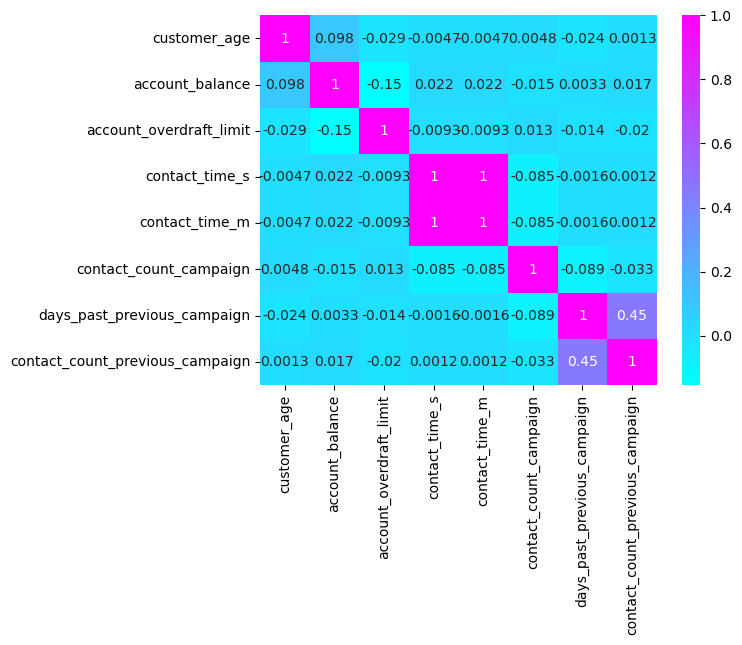

In [35]:
# Create list of numerical columns
numerical_columns = [
    'customer_age', 'account_balance', 'account_overdraft_limit', 
    'contact_time_s', 'contact_time_m', 'contact_count_campaign', 
    'days_past_previous_campaign', 'contact_count_previous_campaign']

# Correlation matrix
correlation_matrix = Bank_Data_5[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.show()

There exists a perfect correlation of 1 between contact time (seconds and minutes).Since these provide the same information about the data,it would be useful to reduce to one variable to avoid redundancy.The rest of the variables exhibit weak correlations,with days past previous campaign and contact count previous campaign being moderately positive with correlation of 0.45.This indicates that for the customers who have been previously contacted ofently have had a greater number of days since the last campaign.

In [37]:
#Drop contact_time(seconds)

Bank_Data_5 = Bank_Data_3.drop(columns=['contact_time_s'])

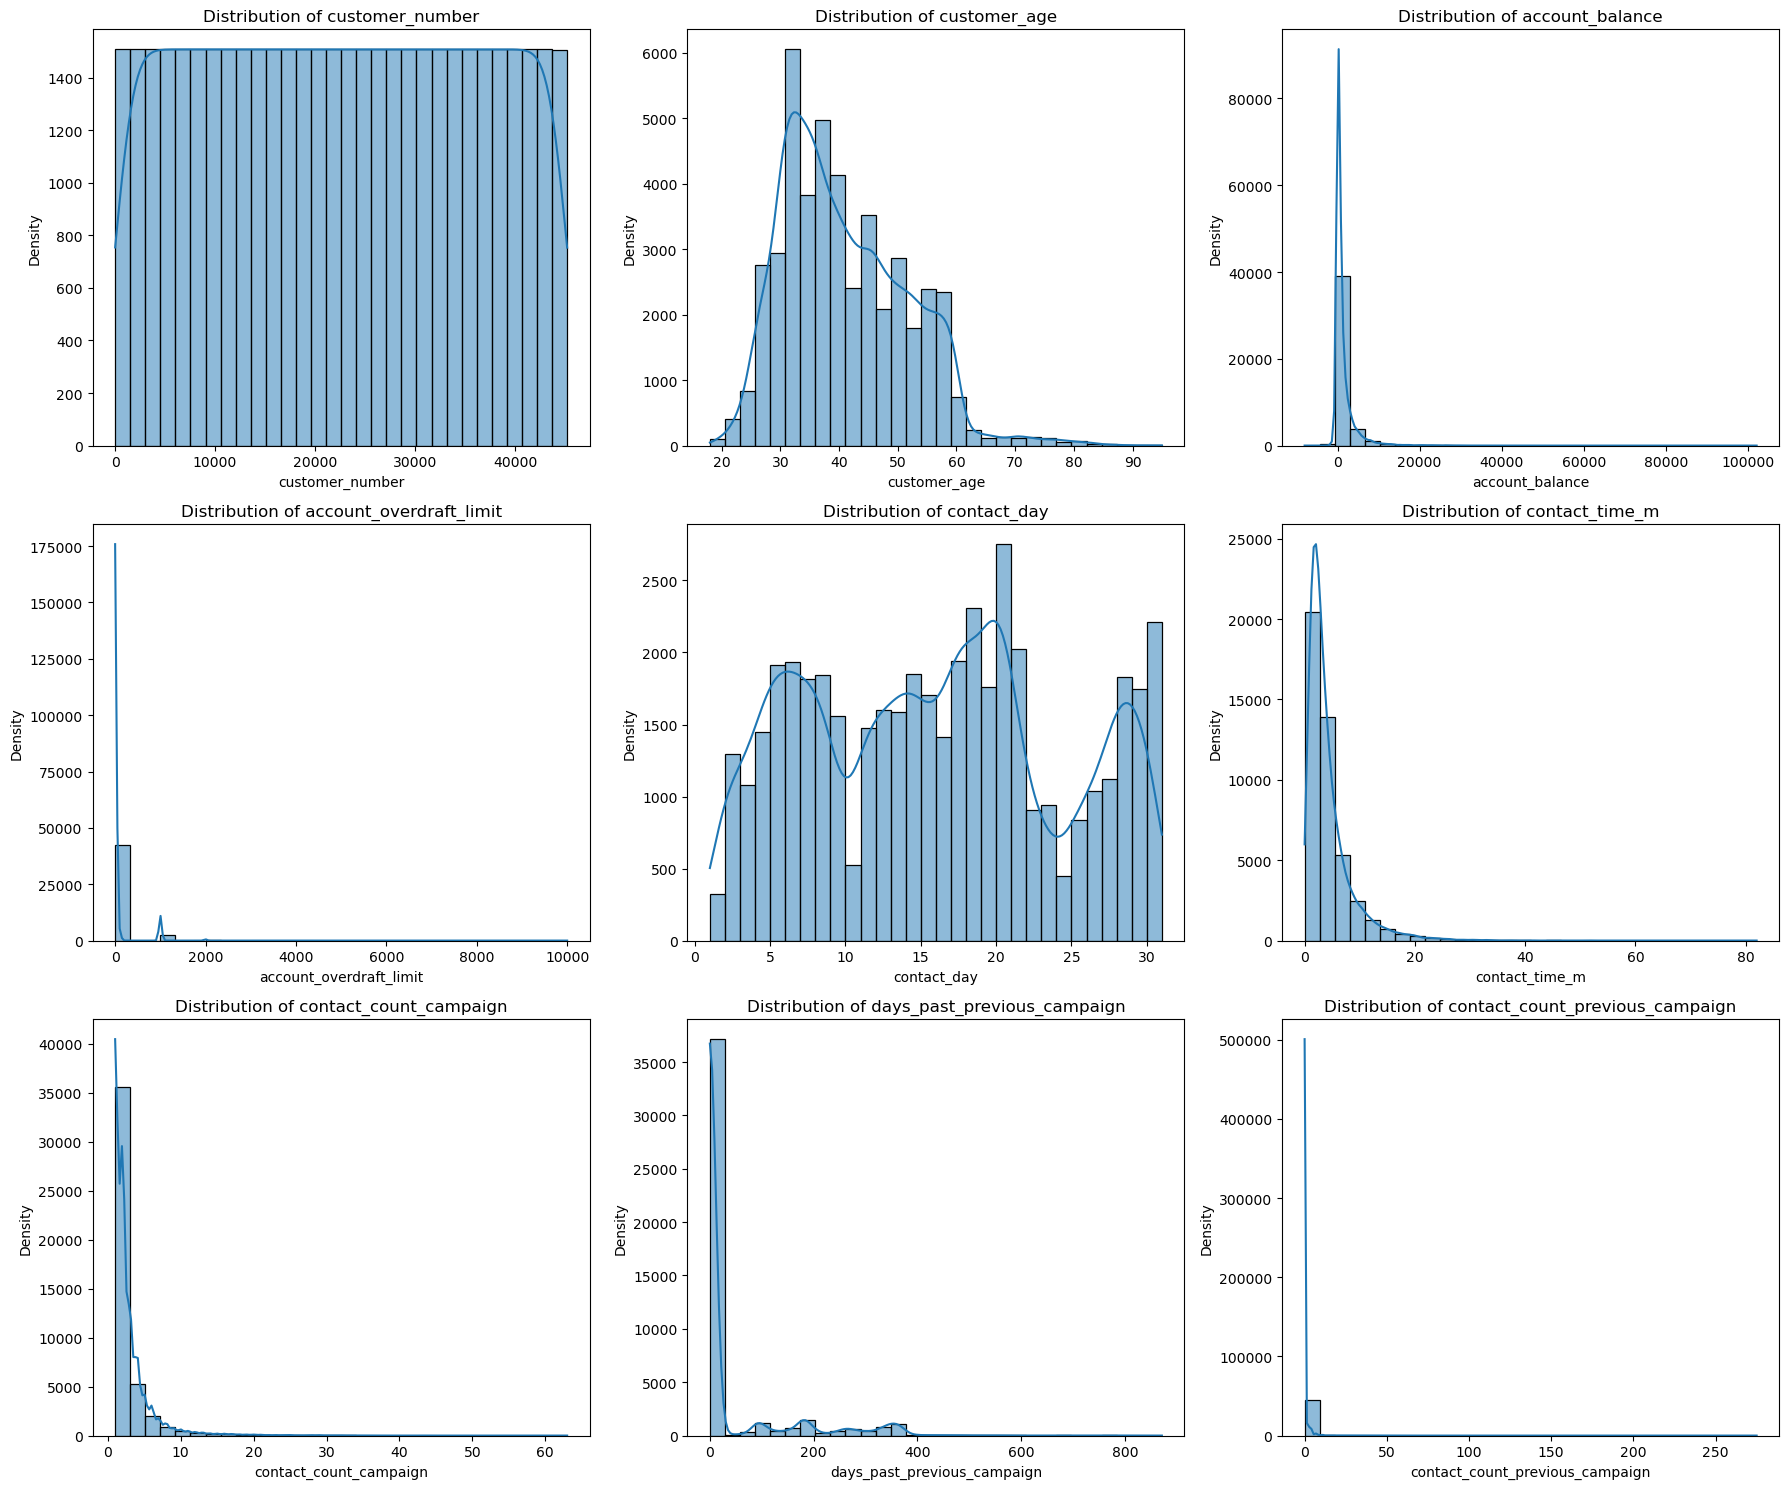

In [38]:
# Select numerical columns
numerical_columns = Bank_Data_5.select_dtypes(include=['float64', 'int64']).columns

# Set up the number of rows and columns for the plots
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create the subplots
plt.figure(figsize=(18, num_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(Bank_Data_5[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

distribution of customer_age:

The age distribution is right-skewed, with most customers falling between the ages of 20 to 60, peaking around 30-35. There are fewer customers above 60, which is common in many datasets where older age groups are underrepresented. Distribution of account_balance:

This distribution is highly right-skewed, with a large number of customers having a lower account balance. A few customers have significantly higher balances, leading to a long tail on the right side. Distribution of account_overdraft_limit:

The overdraft limit also shows a strong right-skew, with most customers having little to no overdraft limit. A small number of customers have a much higher limit. Distribution of contact_day:

The contact days are somewhat uniformly distributed across the month, with slight peaks on certain days, possibly indicating specific days when customers are more likely to be contacted. Distribution of contact_time_s:

The time spent on contact in seconds shows a sharp right-skew, with most contacts being brief and a few extending to longer durations. Distribution of contact_time_m:

Similarly, when contact time is measured in minutes, the distribution remains right-skewed, with most contacts being very short and only a few extending beyond a few minutes. Distribution of contact_count_campaign:

The number of contacts per campaign is right-skewed, with most customers being contacted only a few times, and very few contacted multiple times. This is typical in marketing campaigns where most contacts do not require repeated outreach. Distribution of days_past_previous_campaign:

This variable shows a right-skewed distribution, with most customers having a short interval since the last campaign, and a few having a much longer gap. Distribution of contact_count_previous_campaign:

This distribution is extremely right-skewed, with most customers having no or very few previous contacts. A very small number of customers have a high number of contacts from previous campaigns. Overall Insights: Right-skewness: Most variables exhibit right-skewness, indicating that the majority of data points are clustered at lower values with fewer high-value outliers. This is common in financial and marketing data. Uniformity in Contact Days: The contact day variable shows some uniformity, which might suggest an equal distribution of marketing efforts across the month.

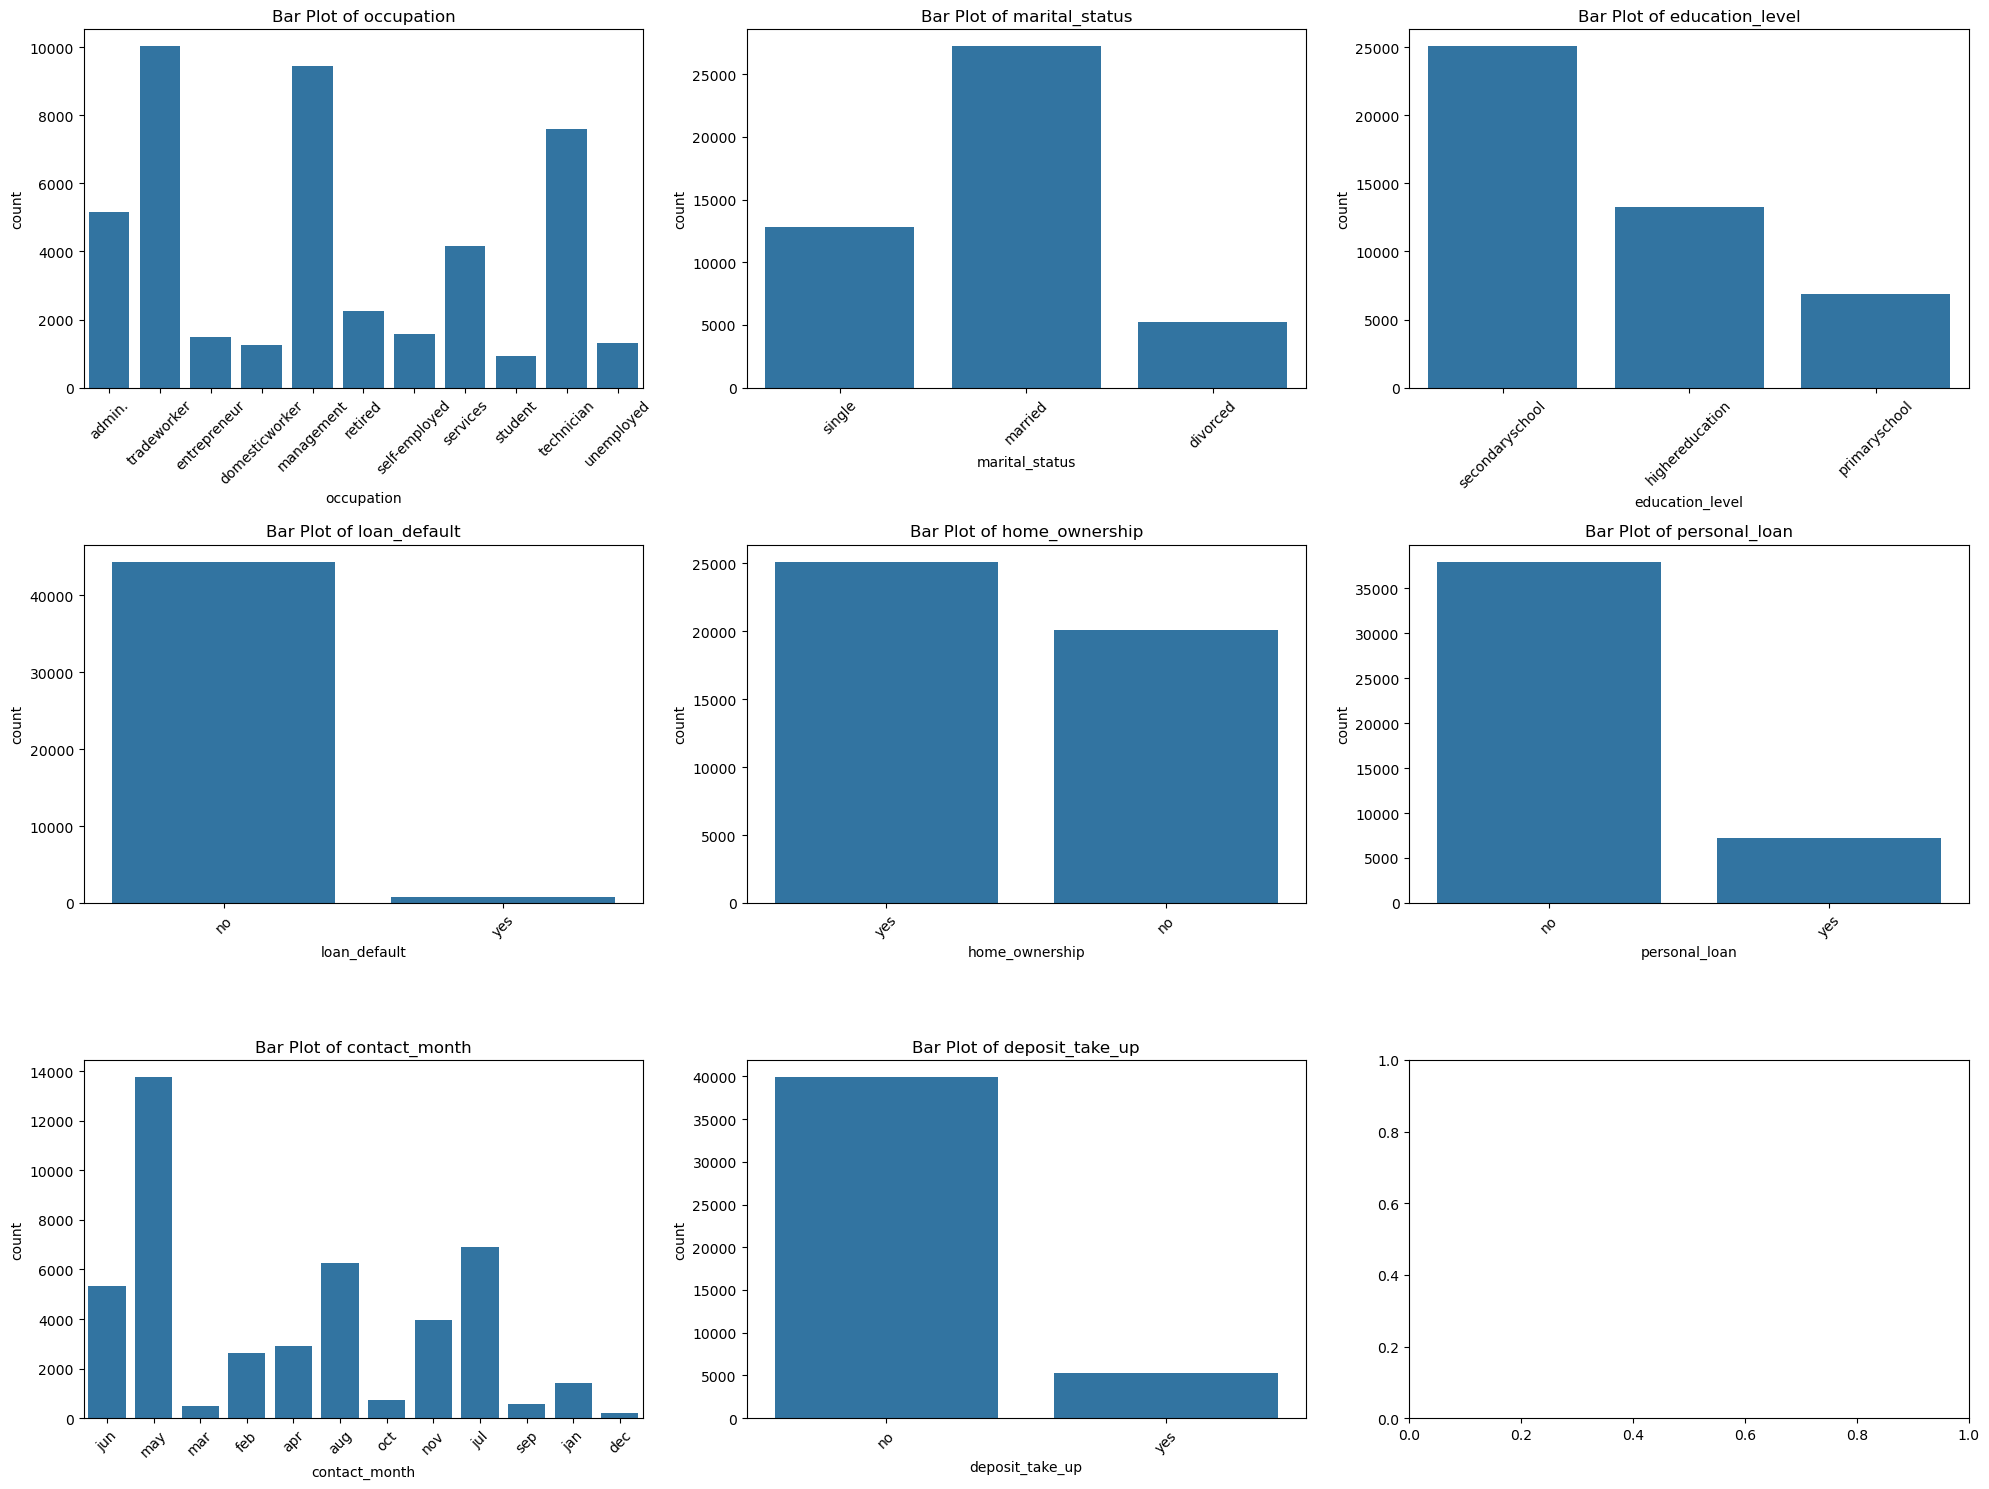

In [40]:
#Visualise categorical features
# Create list of categorical columns
categorical_columns = [
    'occupation', 'marital_status', 'education_level', 'loan_default', 
    'home_ownership', 'personal_loan', 'contact_month',  'deposit_take_up'
]
# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), squeeze=False)

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    ax = axes[i // n_cols, i % n_cols]
    if column in Bank_Data_5.columns:
        sns.countplot(x=column, data=Bank_Data_5, ax=ax)
        ax.set_title(f'Bar Plot of {column}')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.text(0.5, 0.5, f"'{column}' not found", ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Output
plt.show()

The barplots indicate that the majority of the bank's customers are married, work as technicians or in management, and have completed secondary school. The vast majority do not possess personal debts or have a history of loan default; nonetheless, property ownership is marginally more prevalent. The bank contacts the most customers in May, but not many have taken up the deposit proposals.Overall,the is a greater count of people rejecting the long-term deposists proposals than those who give in to the sales calls.

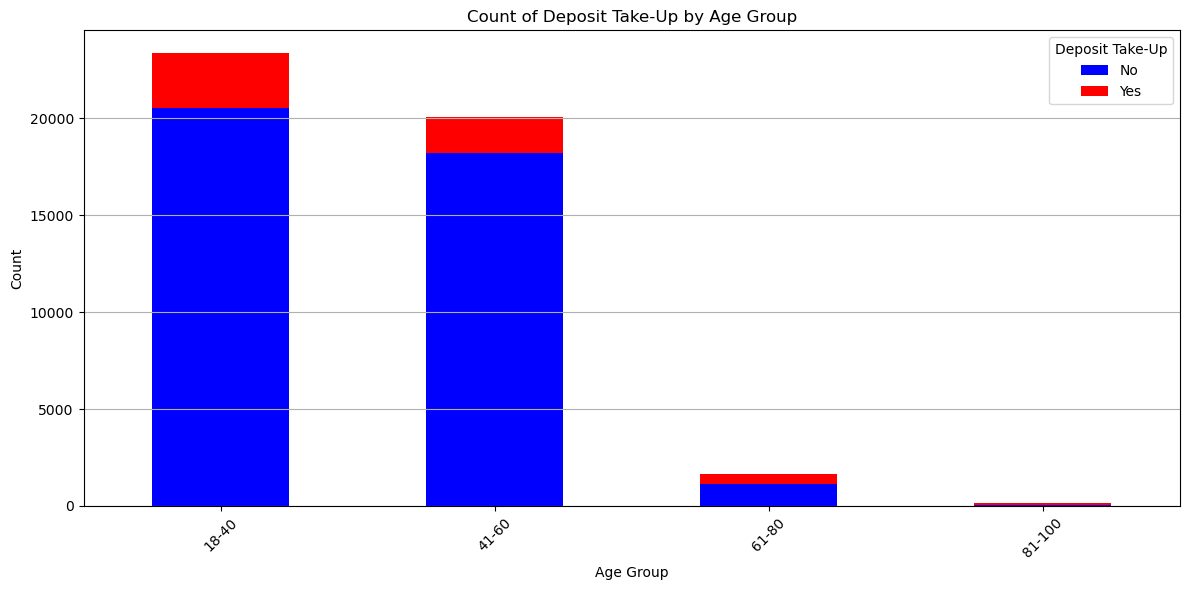

In [42]:
# Create bins for customer age
bins = [18, 40, 60, 80, 100]
bin_labels = ['18-40', '41-60', '61-80', '81-100']
#Bin the age data 
Bank_Data_5['age_group'] = pd.cut(Bank_Data_5['customer_age'], bins=bins, labels=bin_labels, right=False)

# Count occurrences of deposit_take_up for each age group
count_age_deposit = pd.crosstab(Bank_Data_5['age_group'], Bank_Data_5['deposit_take_up'])

# Plot the data
count_age_deposit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Deposit Take-Up by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Deposit Take-Up', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()

# Visualize the Output
plt.show()

The age group was binned into four groups.The age ranges with the largest count of deposit take-ups are 18–40 and 41–60,however the majority of people in these ranges did not accept the deposit offer (blue bars).Across all age groups there is only a small percentage of people who take up the offer(red bars).Age groups 61-80 and 81-100  have extremely low overall numbers and low deposit take-up.

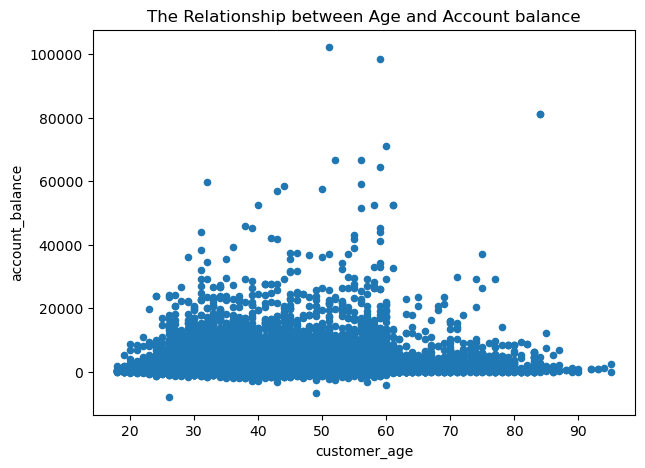

In [44]:
#Scatterplot of age vs account_balance
Scatter_age_contact_time = Bank_Data_5.plot.scatter('customer_age','account_balance',figsize = (7,5))

plt.title('The Relationship between Age and Account balance')
plt.show()

The scatterplot reveals that the majorty of high account balances are found before the age of 60 years.This might be due to retirement, and it could be useful to target those in their middle ages as they have more to invest.However,there are a few extreme account balances post the middle ages.

Encoding categorical variables

In [47]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45212 entries, 0 to 45219
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   customer_number                  45212 non-null  int64   
 1   customer_age                     45212 non-null  int64   
 2   occupation                       45212 non-null  object  
 3   marital_status                   45212 non-null  object  
 4   education_level                  45212 non-null  object  
 5   loan_default                     45212 non-null  object  
 6   account_balance                  45212 non-null  int64   
 7   account_overdraft_limit          45212 non-null  int64   
 8   home_ownership                   45212 non-null  object  
 9   personal_loan                    45212 non-null  object  
 10  contact_day                      45212 non-null  int64   
 11  contact_month                    45212 non-null  object  
 12  contact_t

In [48]:
# Encode categorical variables
categorical_columns = [
    'occupation',
    'marital_status',
    'education_level',
    'loan_default',
    'home_ownership',
    'personal_loan', 'home_ownership']

# Create dummy variables
Bank_Data_5= pd.get_dummies(Bank_Data_5, columns=categorical_columns, drop_first=True)

# For binary target use label encoding
Bank_Data_5['deposit_take_up'] = Bank_Data_5['deposit_take_up'].map({'no': 0, 'yes': 1})

In [49]:
#Encoding the target variable
from sklearn.preprocessing import OrdinalEncoder
#Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'contact_month' column(ordered )
Bank_Data_5['contact_month_encoded'] = encoder.fit_transform(Bank_Data_5[['contact_month']])

# Drop the 'contact_month' column
Bank_Data_5 = Bank_Data_5.drop(columns=['contact_month'])

In [50]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45212 entries, 0 to 45219
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   customer_number                  45212 non-null  int64   
 1   customer_age                     45212 non-null  int64   
 2   account_balance                  45212 non-null  int64   
 3   account_overdraft_limit          45212 non-null  int64   
 4   contact_day                      45212 non-null  int64   
 5   contact_time_m                   45212 non-null  float64 
 6   contact_count_campaign           45212 non-null  int64   
 7   days_past_previous_campaign      45212 non-null  int64   
 8   contact_count_previous_campaign  45212 non-null  int64   
 9   deposit_take_up                  45212 non-null  int64   
 10  age_group                        45212 non-null  category
 11  occupation_domesticworker        45212 non-null  bool    
 12  occupatio

Encoding the categorical variables resulted in a total of 30 features.

### Model development

##### Logistic Regression

In [54]:
Bank_Data_5 = Bank_Data_5.drop(columns=['age_group'])

Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Bank_Data_5.drop('deposit_take_up',axis=1), 
                                                    Bank_Data_5['deposit_take_up'], test_size=0.30, 
                                                    random_state=101)

Training and Predicting

In [59]:
from sklearn.linear_model import LogisticRegression

Notice that age_group is non numeric, we drop this one

In [61]:
logmodel = LogisticRegression()
M = logmodel.fit(X_train,y_train)

C:\Users\LuckyboyM\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:
predictions = logmodel.predict(X_test)

Evaluation

In [64]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12022
           1       0.54      0.16      0.25      1542

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



- Precision for class 0 at 0.90; Out of all the instances predicted as class 0, 90% were actually class 0.
- Precision for class 1 at 0.54; Out of all the instances predicted as class 1, only 54% were actually class 1.
- Recall for class 0 at 0.98; Out of all the actual class 0 instances, 98% were correctly identified as class 0.
- Recall for class 1 at 0.16; Out of all the actual class 1 instances, only 16% were correctly identified as class 1.
- Class Imbalance: There is a significant class imbalance, with class 0 having many instances (12022) compared to class 1 (1542). This imbalance is likely causing the model to be biased towards class 0.
- Weighted Average: gives us a more realistic view of the models overall performance.
    
- Overall accuracy of the model is 0.89, meaning the model correctly predicted 89% of the instances.
This accuracy may seem high, but it is misleading due to the class imbalance. 
The model is mostly accurate because it correctly predicts the majority class (class 0) but fails to generalize well for class 1.


In [67]:
print("The accuracy of the model is: ", metrics.accuracy_score(predictions,y_test)*100, "%")

The accuracy of the model is:  88.91182542023002 %


In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[11806,   216],
       [ 1288,   254]], dtype=int64)

#### Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [71]:
# train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

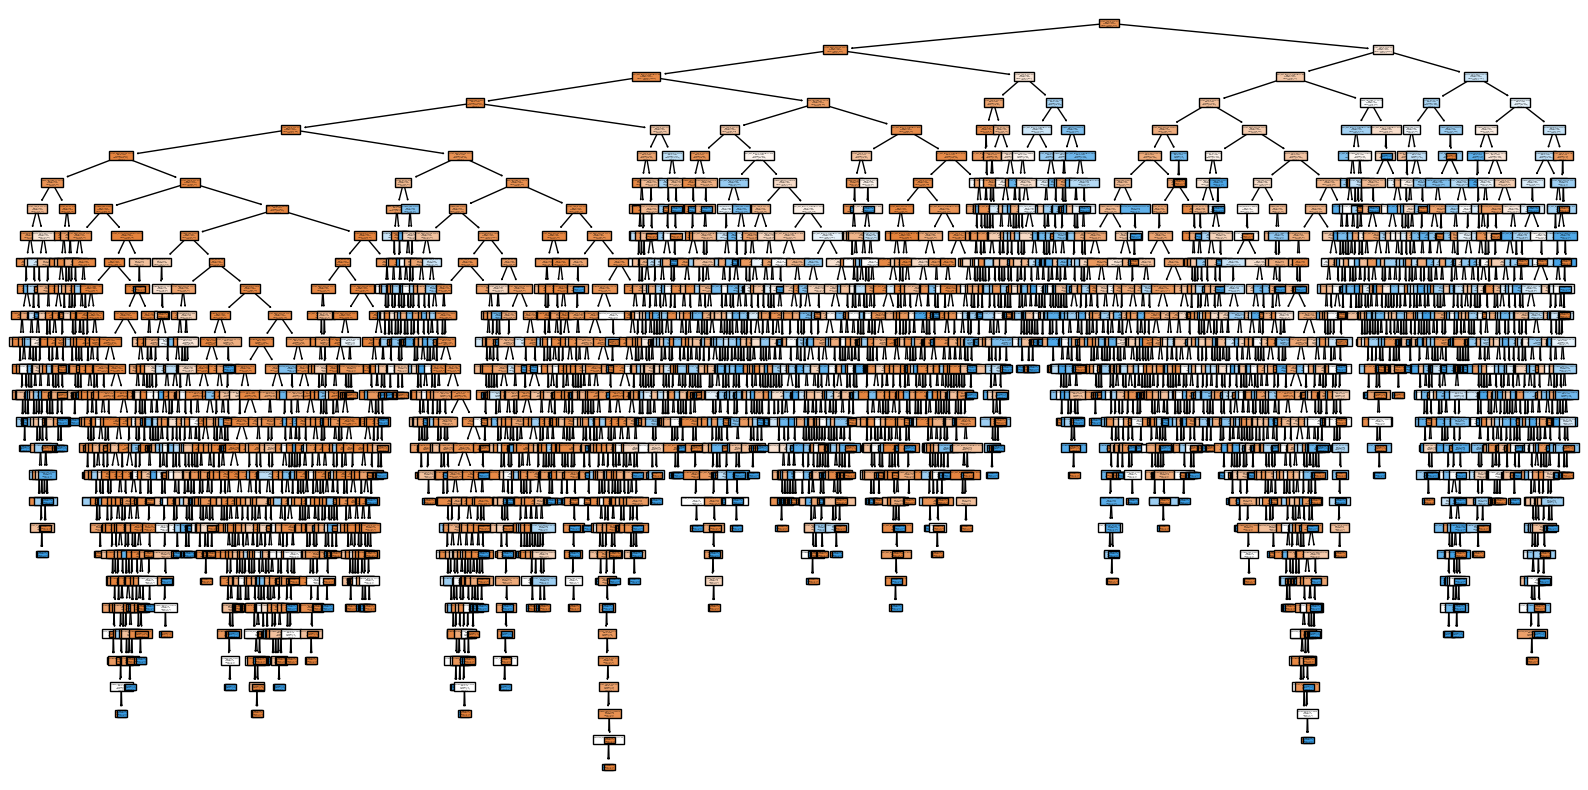

In [72]:
#not necessary but...why not?
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=Bank_Data_5.drop(columns=['deposit_take_up']).columns, class_names=Bank_Data_5['deposit_take_up'].unique().astype(str))
plt.show()

In [73]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.81%


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [75]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Confusion Matrix:
[[11112   910]
 [  879   663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12022
           1       0.42      0.43      0.43      1542

    accuracy                           0.87     13564
   macro avg       0.67      0.68      0.68     13564
weighted avg       0.87      0.87      0.87     13564

